In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
input_path = "./Exercise 6.2/"

In [12]:
def region_growing(img, seed, tolerance=0, tag=1):
    img_int32 = img.astype(np.int32)
    
    value = img[seed[0], seed[1]]
    frontier = [seed]
    output = np.zeros_like(img)

    while len(frontier) > 0:
        x,y = frontier.pop()
        
        # Already visited pixel
        if output[x,y] > 0:
            continue
            
        # Pixel does not meet the condition
        if abs(value - img_int32[x,y]) > tolerance:
            continue
        
        output[x,y] = tag

        # Add the neighbours to the frontier
        if x > 0:                frontier.append((x-1,y))
        if x < img.shape[0] - 1: frontier.append((x+1,y))
        if y > 0:                frontier.append((x,y-1))
        if y < img.shape[1] - 1: frontier.append((x,y+1))
            
    return output


# 2. Segmenting and Tagging

Given the image in Figure 1, segment each of the lungs of the CT image obtained in exercise 5.2 (Fig. 1) and tag each one with different labels.

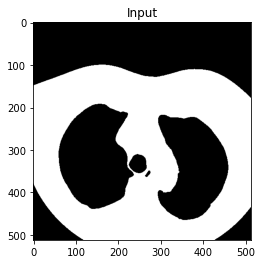

In [13]:
img_lungs = cv2.imread(input_path + 'CT_1_cleaned.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_lungs, cmap='gray')
plt.title("Input")
plt.show()

Unique gray levels: [  0  64 192]


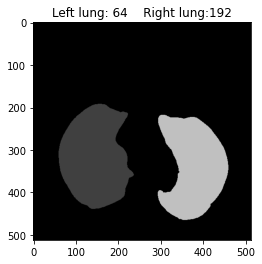

In [14]:
# Detect both lungs with a seed inside each of them
lung_left = region_growing(img_lungs, (300, 150), tag=64)
lung_right = region_growing(img_lungs, (300, 375), tag=192)
lungs = lung_left + lung_right
print("Unique gray levels:", np.unique(lungs))

# Show the results
plt.imshow(lungs, 'gray', vmin=0, vmax=255)
plt.title("Left lung: 64    Right lung:192")
plt.show()